Title: Two Sums (via Leetcode)
Slug: two-sums-python
Summary: Beginner Python algorithm problem with practical applications to the Big O notation.
Date: 2018-09-23 15:00  
Category: Python
Subcategory: Beginner Algorithms
PostType: Tutorial
Tags: functions, loops, lists, dictionaries
Keywords: two sum leetcode python
Authors: Dan Friedman

This example was found on <a href='https://leetcode.com/problems/two-sum/' rel='nofollow'>Leetcode</a>.

In this tutorial, I'll walk extensively through my logic for solving this problem.

**Problem statement:**

Given an array of integers, return indices of the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

**Example:**

`Given nums = [2, 7, 11, 15], target = 9,`

`Because nums[0] + nums[1] = 2 + 7 = 9, `
`return [0, 1].`

If you'd just like to see the answer, [this link scrolls down the page to it](#best_answer).

#### Import Modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import sys
import numpy as np
from time import time
import logging
% matplotlib inline

#### Visualization Setup Code

In [2]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format

#### Setup Format of Logging Messages

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)-25s %(levelname)-7s %(lineno)-4s %(message)-8s')                      

#### Simple Problem Setup Data

In [4]:
nums = [2, 7, 11, 15]
target = 9

### The Brute Force Approach: O(n^2) Time Complexity

The first solution that came to my mind was to calculate all possible combinations through a nested for loop.

In a nested for loop, for each item in the list, I'll compare it to all items in the list. Let's setup that logic below.

In [5]:
for num_outer in nums:
    for num_inner in nums:
        logging.info("outer loop value: {0} and inner loop value: {1}".format(num_outer, num_inner))

2018-09-26 11:27:32,408   INFO    3    outer loop value: 2 and inner loop value: 2
2018-09-26 11:27:32,410   INFO    3    outer loop value: 2 and inner loop value: 7
2018-09-26 11:27:32,411   INFO    3    outer loop value: 2 and inner loop value: 11
2018-09-26 11:27:32,412   INFO    3    outer loop value: 2 and inner loop value: 15
2018-09-26 11:27:32,413   INFO    3    outer loop value: 7 and inner loop value: 2
2018-09-26 11:27:32,414   INFO    3    outer loop value: 7 and inner loop value: 7
2018-09-26 11:27:32,415   INFO    3    outer loop value: 7 and inner loop value: 11
2018-09-26 11:27:32,415   INFO    3    outer loop value: 7 and inner loop value: 15
2018-09-26 11:27:32,416   INFO    3    outer loop value: 11 and inner loop value: 2
2018-09-26 11:27:32,417   INFO    3    outer loop value: 11 and inner loop value: 7
2018-09-26 11:27:32,418   INFO    3    outer loop value: 11 and inner loop value: 11
2018-09-26 11:27:32,418   INFO    3    outer loop value: 11 and inner loop valu

In the problem statement, there was mention to "not use the same element twice". The logic above breaks that rule because we compare each element from the outer loop to the same element in the inner loop. For example, on our first logged message, we compare `2` to `2` which breaks our rule.

In order to write logic so that we don't compare numbers to itself, I think it'd be helpful to track the indices of items we iterate over. In a future iteration, if we arrive at a point in which we compare the same index of the inner loop to the outer loop, we can pass as that wouldn't yield a correct solution to this problem.

To track the index of each item looped over in the list, let's use the `enumerate()` function built into Python's standard library.

Essentially, the `enumerate()` function adds a counter to an iterable. Our original list, `nums`, is an iterable.

If we pass our `nums` list to the `enumerate()` function, we're returned an `enumerate` object. This is an immutable object so it can't be modified in place. This object contains a list of tuples (immutable elements) - each with a pair of an index and an item value.

In [6]:
enumerate(nums)

Let's cast our `enumerate` object to a mutable list using the `list()` function.

In [7]:
list(enumerate(nums))

[(0, 2), (1, 7), (2, 11), (3, 15)]

We can now see the indexes and values in our `nums` list. In our list, for each tuple, the first value is the index of the item in our list `nums` and the second value is the item value. The table below also shows this.

Index | Value 
--- | --- 
0 | 2
1 | 7 
2 | 11
3 | 15

Remember, our `enumerate` object is an iterable so we can loop over each of the indices and values.

In [8]:
for index, item in enumerate(nums):
    logging.info("index: {0} and item value: {1}".format(index, item))

2018-09-26 11:27:32,441   INFO    2    index: 0 and item value: 2
2018-09-26 11:27:32,442   INFO    2    index: 1 and item value: 7
2018-09-26 11:27:32,444   INFO    2    index: 2 and item value: 11
2018-09-26 11:27:32,445   INFO    2    index: 3 and item value: 15


Now let's use this similar logic for the `enumerate()` function to get the indices in our earlier nested for loop.

In [9]:
for index_outer, num_outer in enumerate(nums):
    for index_inner, num_inner in enumerate(nums):
        logging.info("outer loop value: {0} at index {1} and inner loop value: {2} at index {3}".format(num_outer, index_outer, num_inner, index_inner))

2018-09-26 11:27:32,450   INFO    3    outer loop value: 2 at index 0 and inner loop value: 2 at index 0
2018-09-26 11:27:32,453   INFO    3    outer loop value: 2 at index 0 and inner loop value: 7 at index 1
2018-09-26 11:27:32,455   INFO    3    outer loop value: 2 at index 0 and inner loop value: 11 at index 2
2018-09-26 11:27:32,456   INFO    3    outer loop value: 2 at index 0 and inner loop value: 15 at index 3
2018-09-26 11:27:32,457   INFO    3    outer loop value: 7 at index 1 and inner loop value: 2 at index 0
2018-09-26 11:27:32,458   INFO    3    outer loop value: 7 at index 1 and inner loop value: 7 at index 1
2018-09-26 11:27:32,459   INFO    3    outer loop value: 7 at index 1 and inner loop value: 11 at index 2
2018-09-26 11:27:32,461   INFO    3    outer loop value: 7 at index 1 and inner loop value: 15 at index 3
2018-09-26 11:27:32,462   INFO    3    outer loop value: 11 at index 2 and inner loop value: 2 at index 0
2018-09-26 11:27:32,463   INFO    3    outer loop 

In the problem statement, there was mention to "not use the same element twice". Now that we *can* track the indices of each element we iterate over, we can incorporate logic to ensure we don't compare a value to itself.

In [10]:
for index_outer, num_outer in enumerate(nums):
    for index_inner, num_inner in enumerate(nums):
        if index_outer != index_inner:
            logging.info("outer loop value: {0} at index {1} and inner loop value: {2} at index {3}".format(num_outer, index_outer, num_inner, index_inner))

2018-09-26 11:27:32,474   INFO    4    outer loop value: 2 at index 0 and inner loop value: 7 at index 1
2018-09-26 11:27:32,475   INFO    4    outer loop value: 2 at index 0 and inner loop value: 11 at index 2
2018-09-26 11:27:32,476   INFO    4    outer loop value: 2 at index 0 and inner loop value: 15 at index 3
2018-09-26 11:27:32,477   INFO    4    outer loop value: 7 at index 1 and inner loop value: 2 at index 0
2018-09-26 11:27:32,478   INFO    4    outer loop value: 7 at index 1 and inner loop value: 11 at index 2
2018-09-26 11:27:32,479   INFO    4    outer loop value: 7 at index 1 and inner loop value: 15 at index 3
2018-09-26 11:27:32,480   INFO    4    outer loop value: 11 at index 2 and inner loop value: 2 at index 0
2018-09-26 11:27:32,481   INFO    4    outer loop value: 11 at index 2 and inner loop value: 7 at index 1
2018-09-26 11:27:32,482   INFO    4    outer loop value: 11 at index 2 and inner loop value: 15 at index 3
2018-09-26 11:27:32,483   INFO    4    outer lo

In regards to our problem statement, we want to check what two numbers in our list add up to our target. Let's incorporate this logic in the `if` clause.

Let's also wrap our logic in a function so when we find our solution, we can break out of the function and return the indices.

In [11]:
def two_sums(nums, target):
    """
    Given a list of integers, return indices of the two numbers such that they add up to a specific target.

    :param nums: list of integers
    :param target: integer 
    :returns: list of two indices as integers
    """
    logging.debug("begin iteration for a nested for loop over the indices and values in nums")
    for index_outer, num_outer in enumerate(nums):
        for index_inner, num_inner in enumerate(nums):
            logging.debug("check we're not comparing a value to itself")
            logging.debug("check if two values in the list are equal to the target")
            if index_outer != index_inner and num_outer + num_inner == target:
                logging.info("These are our two values! The outer loop value: {0} at index {1} and inner loop value: {2} at index {3}".format(num_outer, index_outer, num_inner, index_inner))
                logging.info("{0} + {1} = {2}".format(num_outer, num_inner, target))
                return [index_outer, index_inner]

Call the function below.

In [12]:
two_sums(nums, target)

2018-09-26 11:27:32,499   INFO    15   These are our two values! The outer loop value: 2 at index 0 and inner loop value: 7 at index 1
2018-09-26 11:27:32,500   INFO    16   2 + 7 = 9


[0, 1]

This logic seems to work! However, what happens if the length of our list items drastically increases - perhaps from 4 items to 9000? Also, what if the target is the sum of the 8999th and 9000th items in the list? That would be considered our worst case scenario. 

Validating the runtime of our code as the length of list items drastically increases will help us understand the time complexity of our code. Later, we'll visualize this time complexity.

Below is a very simple example of our setup data. Note, how I create a list of `nums` assigned to `[0, 1, 2, 3, 4, 5]`. I purposely make the target `9` so that it's the sum of the last two values in our list.

In [13]:
max_list_value = 5
start_range = 0
step = 1
nums = list(range(start_range, max_list_value+1, step))
target = max_list_value + (max_list_value - step)

In [14]:
nums

[0, 1, 2, 3, 4, 5]

In [15]:
target

9

Let's put this logic to setup `nums` and `target` in a function since we'll re-use it later.

In [16]:
def calculate_two_sums_setup_data(max_list_value):
    """
    :param nums: list of integers
    
    Given a max_list_value, calculate a worse case scenario for two_sums setup data. 
    Create a list of nums from 0 to our max_list_value with a step of 1.
    Our target is the sum of the last two values in our list of nums.
    
    :returns: nums, target - a tuple of a list of numbers and a target integer value
    """
    start_range = 0
    step = 1
    nums = list(range(start_range, max_list_value+1, step))
    target = max_list_value + (max_list_value - step)
    return nums, target

Below, we run our `two_sums` function multiple times, each time with a new and longer list of items in `nums`, and we record the time it takes to complete the `two_sums` calculations to return the result.

In [17]:
length_list_items = [200, 600, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 9000]
completion_times = []

for max_list_value in length_list_items:
    nums, target = calculate_two_sums_setup_data(max_list_value)
    start_time = time()
    logging.debug("call our two_sums function")
    two_sums(nums, target)
    end_time = time()
    time_elapsed = end_time - start_time
    logging.info("for {0} list items, program took {1} seconds to compute".format(max_list_value, time_elapsed))
    completion_times.append(time_elapsed)

2018-09-26 11:27:32,642   INFO    15   These are our two values! The outer loop value: 199 at index 199 and inner loop value: 200 at index 200
2018-09-26 11:27:32,643   INFO    16   199 + 200 = 399
2018-09-26 11:27:32,644   INFO    11   for 200 list items, program took 0.11205101013183594 seconds to compute
2018-09-26 11:27:33,554   INFO    15   These are our two values! The outer loop value: 599 at index 599 and inner loop value: 600 at index 600
2018-09-26 11:27:33,555   INFO    16   599 + 600 = 1199
2018-09-26 11:27:33,556   INFO    11   for 600 list items, program took 0.9107637405395508 seconds to compute
2018-09-26 11:27:36,109   INFO    15   These are our two values! The outer loop value: 999 at index 999 and inner loop value: 1000 at index 1000
2018-09-26 11:27:36,110   INFO    16   999 + 1000 = 1999
2018-09-26 11:27:36,110   INFO    11   for 1000 list items, program took 2.553212881088257 seconds to compute
2018-09-26 11:27:42,086   INFO    15   These are our two values! The o

Below, let's visualize the seconds to compute for each run of `two_sums` with a certain number of list items in `nums`.

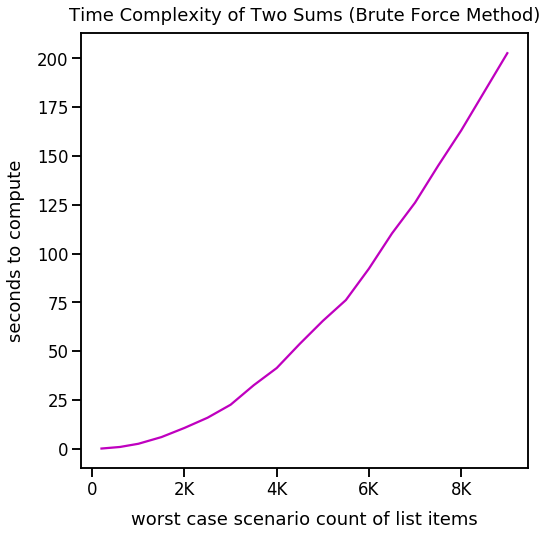

In [18]:
sns.set_context('talk')
plt.figure(figsize=(8, 8))
plt.plot(length_list_items, completion_times, color='m')
plt.title("Time Complexity of Two Sums (Brute Force Method)", y=1.015)
plt.xlabel("worst case scenario count of list items", labelpad=12)
plt.ylabel("seconds to compute", labelpad=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

This curve looks exponential! The reason for that is that by time complexity standards, we perform O(n²). *n* is the length of items in `nums` and we essentially perform *n²* iterations because for each value of *n*, we multiply it by all other values in *n*.

We generally want to avoid O(n²) time complexity because as *n* increase, our program will take exponentially longer to complete. 

However, on the good side, our solution is just O(1) by space complexity because we just store the resultant indices.

Generally, there's a tradeoff between time and space complexity. In the next method to solve this problem, we'll trade off time complexity for space complexity. So our code will run much quicker, but we'll save more on disk.

### A Faster Method

We don't need to loop through the entire list multiple times. Rather, we can develop an alternative method that saves the index and values of numbers in the `nums` list as a dictionary. Once we have that dictionary, we can do many quick O(1) lookups to see if any two numbers we've iterated over add up to our `target`.

#### A Simple Walkthrough of this Faster Method

In [19]:
nums = [1, 2, 3, 4]
target = 7

Let's say we're iterating over the four items in `nums` above. As we iterate over the first three items, we could store them in a dictionary seen below by `dict_past_iterated_nums_and_indices`. The keys are the items in `nums` and the values in the dictionary are the items respective index in `nums`.

In [20]:
dict_past_iterated_nums_and_indices = {1: 0, 2: 1, 3: 1}

In a Python dictionary, in a O(1) time complexity operation, we can lookup a key and are returned a boolean value.

`1` is a key in `dict_past_iterated_nums_and_indices`.

In [21]:
1 in dict_past_iterated_nums_and_indices

True

2 is a key in `dict_past_iterated_nums_and_indices`

In [22]:
2 in dict_past_iterated_nums_and_indices

True

But, there's no key with a value of `5` in `dict_past_iterated_nums_and_indices`.

In [23]:
5 in dict_past_iterated_nums_and_indices

False

We know `4` is the last item in `nums`. That would be the last item we iterate over in a single loop over the items in `nums`. 

Our `target` is `7` so once our iteration reaches 4, we can easily lookup if there exists a number in which `target`-`4` which is equal to `3` exists in `dict_past_iterated_nums_and_indices`.

In [24]:
target - 4

3

In [25]:
target - 4 in dict_past_iterated_nums_and_indices

True

It does! Based on this logic, we need just one iteration over our `nums` in order to find the solution.

Let's code up this logic in a function. This is the **<a name="best_answer">best answer</a>** in this tutorial.

In [26]:
def two_sums_faster(nums, target):
    """
    Given a list of integers, return indices of the two numbers such that they add up to a specific target.

    :param nums: list of integers
    :param target: integer 
    :returns: list of two indices as integers
    """
    logging.debug("create empty dictionary to store values and indexes from nums")
    dict_past_iterated_nums_and_indices = {}
    logging.debug("iterate over the indices and items in nums")
    for index, value in enumerate(nums):
        # below, check if there's a previously stored key that when summed up with the current item of our iteration of nums equals the target
        if target - value in dict_past_iterated_nums_and_indices:
            logging.info("we found the two indices: {0}".format([dict_past_iterated_nums_and_indices[target - value], index]))
            return [dict_past_iterated_nums_and_indices[target-value], index]
        # below, add current item in nums as key to our dict and assign the dict value to be the index in nums
        dict_past_iterated_nums_and_indices[value] = index

In [27]:
completion_times_faster_method = []

for max_list_value in length_list_items:
    nums, target = calculate_two_sums_setup_data(max_list_value)
    start_time = time()
    logging.debug("call our two_sums_faster function")
    two_sums_faster(nums, target)
    end_time = time()
    time_elapsed = end_time - start_time
    logging.info("for {0} list items, program took {1} seconds to compute".format(max_list_value, time_elapsed))
    completion_times_faster_method.append(time_elapsed)

2018-09-26 11:47:00,502   INFO    15   we found the two indices: [199, 200]
2018-09-26 11:47:00,503   INFO    10   for 200 list items, program took 0.001399993896484375 seconds to compute
2018-09-26 11:47:00,504   INFO    15   we found the two indices: [599, 600]
2018-09-26 11:47:00,505   INFO    10   for 600 list items, program took 0.001135110855102539 seconds to compute
2018-09-26 11:47:00,506   INFO    15   we found the two indices: [999, 1000]
2018-09-26 11:47:00,507   INFO    10   for 1000 list items, program took 0.0010077953338623047 seconds to compute
2018-09-26 11:47:00,509   INFO    15   we found the two indices: [1499, 1500]
2018-09-26 11:47:00,509   INFO    10   for 1500 list items, program took 0.001130819320678711 seconds to compute
2018-09-26 11:47:00,511   INFO    15   we found the two indices: [1999, 2000]
2018-09-26 11:47:00,511   INFO    10   for 2000 list items, program took 0.001065969467163086 seconds to compute
2018-09-26 11:47:00,513   INFO    15   we found the

Let's visualize the time complexity of this `two_sums_faster` functions.

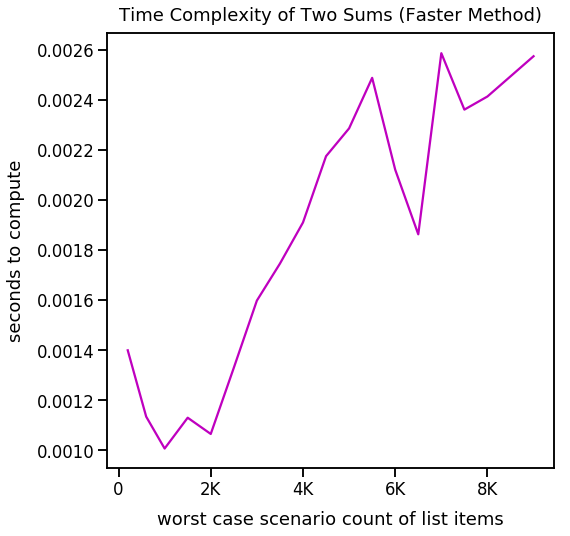

In [28]:
sns.set_context('talk')
plt.figure(figsize=(8, 8))
plt.plot(length_list_items, completion_times_faster_method, color='m')
plt.title("Time Complexity of Two Sums (Faster Method)", y=1.015)
plt.xlabel("worst case scenario count of list items", labelpad=12)
plt.ylabel("seconds to compute", labelpad=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

This line looks to have a consant positive slope, but it's nearly not as steep as our first brute force method. Let's compare the two on the same plot.

### Comparison of Time Complexity of Two Sums Functions on Same Plot

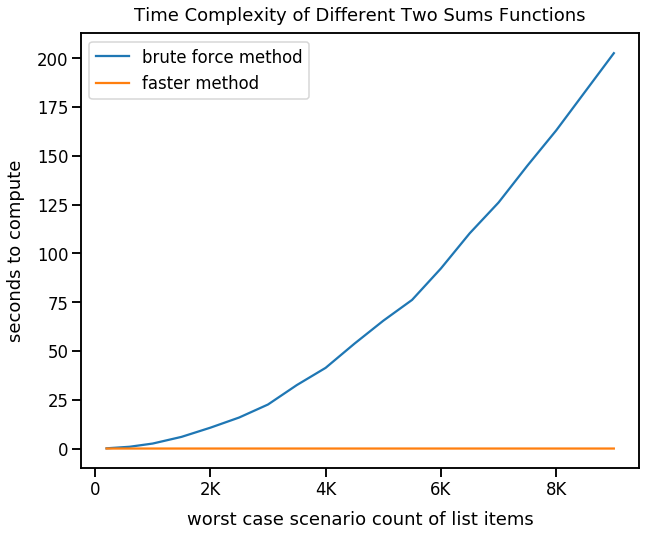

In [29]:
sns.set_context('talk')
plt.figure(figsize=(10, 8))
plt.plot(length_list_items, completion_times, label="brute force method")
plt.plot(length_list_items, completion_times_faster_method, label="faster method")
plt.title("Time Complexity of Different Two Sums Functions", y=1.015)
plt.xlabel("worst case scenario count of list items", labelpad=12)
plt.ylabel("seconds to compute", labelpad=12)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

This visualization tells a much clearer picture of the differences in our two functions to compute the solution.

Our first brute force method has O(n²) time complexity while our second faster method has just O(n) time complexity.

Our first brute force method has O(1) space complexity while our second faster method has O(n) space complexity.